In [10]:
# notebooks/01_introduccion_y_contexto.ipynb

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output
import os
import sys
import time

# Añade la carpeta src al path para poder importar utils.py
src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.append(src_path)

from utils import visualize_blackjack_step

## GYMNASIUM BLACKJACK

In [11]:
# Crear el entorno
env = gym.make("Blackjack-v1", natural=False, sab=False)

In [12]:
# Explorar el espacio de observación y acción
print("Espacio de observación:", env.observation_space)
print("Espacio de acción:", env.action_space)

Espacio de observación: Tuple(Discrete(32), Discrete(11), Discrete(2))
Espacio de acción: Discrete(2)


**Espacio de observación: Tuple(Discrete(32), Discrete(11), Discrete(2))**
- Discrete(32): Representa la suma de las cartas del jugador (entre 0 y 31)
- Discrete(11): Representa el valor de la carta visible del dealer (entre 1 y 10, donde 1 es el As)
- Discrete(2): Indica si el jugador tiene un As útil (0 = no, 1 = sí)

**Espacio de acción: Discrete(2)**
- 0: Quedarse (stick) - No pedir más cartas
- 1: Pedir carta (hit) - Solicitar una carta adicional

=== ESTADO INICIAL ===
  Tupla: (8, 7, 0)
  - Suma jugador: 8
  - Carta visible dealer: 7
  - As útil: 0

Objetivo: acercarte a 21 sin pasarte.
Dealer se planta en 17+ y pide carta por debajo.



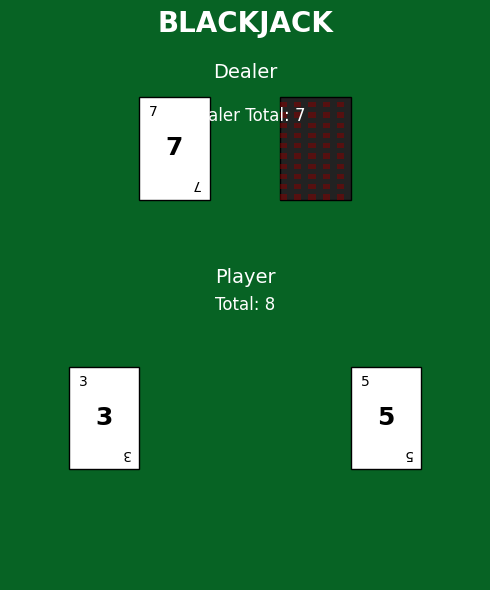


--- Acción: Pedir carta (1) ---


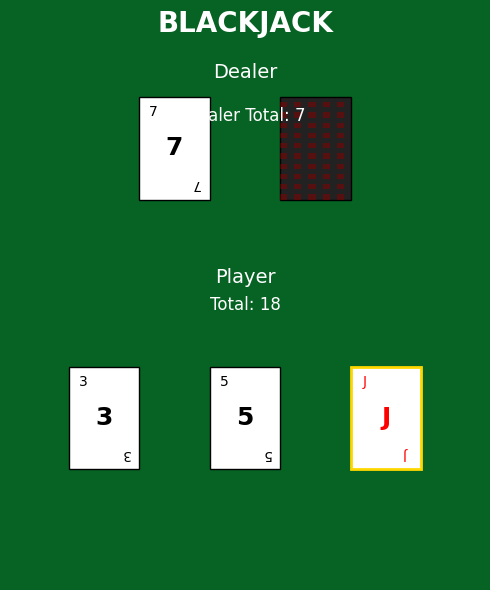


=== RESULTADO DEL PASO ===
  Nuevo estado: (18, 7, 0)
  Recompensa: 0.0
▶ EMPATE: tu suma y la del dealer coinciden.


In [13]:
# — Iniciar episodio —
obs, info = env.reset()
done = False
prev = obs

print("=== ESTADO INICIAL ===")
print(f"  Tupla: {obs}")
print(f"  - Suma jugador: {obs[0]}")
print(f"  - Carta visible dealer: {obs[1]}")
print(f"  - As útil: {obs[2]}")
print(
    "\nObjetivo: acercarte a 21 sin pasarte.\n"
    "Dealer se planta en 17+ y pide carta por debajo.\n"
)

# Mostrar estado inicial
fig = visualize_blackjack_step(prev)
plt.show()

# — Un solo paso —
action = env.action_space.sample()
name = "Pedir carta" if action else "Quedarse"
print(f"\n--- Acción: {name} ({action}) ---")

new_obs, reward, terminated, truncated, info = env.step(action)
time.sleep(0.5)

# Solo revelar cartas del dealer si NO es un bust del jugador
player_bust = new_obs[0] > 21  # Determinar si el jugador se pasó
dealer_hand = (
    env.unwrapped.dealer if (terminated or truncated) and not player_bust else None
)

# Dibujar con posible mano del dealer
fig = visualize_blackjack_step(prev, new_obs, action, dealer_cards=dealer_hand)
plt.show()

print("\n=== RESULTADO DEL PASO ===")
print(f"  Nuevo estado: {new_obs}")
print(f"  Recompensa: {reward}")

# Mensajes según reward
if reward == 1:
    print("▶ GANASTE: tu suma es mayor que la del dealer o éste se pasó.")
elif reward == -1:
    if new_obs[0] > 21:
        print("▶ PERDISTE: te pasaste de 21.")
    else:
        print("▶ PERDISTE: la suma del dealer es mayor.")
else:  # reward==0
    print("▶ EMPATE: tu suma y la del dealer coinciden.")